In [65]:
import panel as pn
pn.extension('plotly')
import plotly.express as px
import pandas as pd
import hvplot.pandas
import matplotlib.pyplot as plt
import numpy as np
import os
from pathlib import Path
import seaborn as sns
import numpy_financial as npf
import datetime as dt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import seaborn as sns
from dotenv import load_dotenv
import os
import requests
import alpaca_trade_api as tradeapi
from datetime import datetime, timedelta
from newsapi.newsapi_client import NewsApiClient
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [50]:
 # Define the base request URL
request_url = "https://www.quandl.com/api/v3/datasets/WIKI/NFLX.json?api_key="

# Concatenate request_url and api_key. Store as new variable

request_url=request_url+api_key

In [51]:
alpaca_key=os.getenv("ALPACA_API_KEY")
alpaca_secret_key=os.getenv("ALPACA_SECRET_KEY")

In [52]:
alpaca=tradeapi.REST(alpaca_key,alpaca_secret_key,api_version="v2")

In [53]:
tickers=["NFLX"]

df_shares=pd.DataFrame(shares_data, index=tickers)

# set timeframe to one day ('1D') for the alpaca API

timeframe='1D'

In [136]:
# format start and end dates as ISO format for one year period
start = pd.Timestamp("2013-01-01", tz="America/New_York").isoformat()
end = pd.Timestamp("2021-05-25", tz="America/New_York").isoformat()


In [137]:
df_portfolio_yr=alpaca.get_barset(tickers,timeframe,start=start,end=end,limit=1000).df
df_portfolio_yr.head()

NFLX                                     
                             open    high       low    close    volume
time                                                                  
2017-06-06 00:00:00-04:00  164.93  166.82  164.5100  165.170   3512616
2017-06-07 00:00:00-04:00  165.60  166.40  164.4086  165.610   2669076
2017-06-08 00:00:00-04:00  166.12  166.87  164.8400  165.880   3020499
2017-06-09 00:00:00-04:00  166.27  166.27  154.5000  158.050   8505676
2017-06-12 00:00:00-04:00  155.30  155.53  148.3100  151.417  11810478

In [138]:
df_closing_prices=pd.DataFrame()
df_closing_prices["NFLX"]=df_portfolio_yr["NFLX"]["close"]
df_closing_prices.index=df_closing_prices.index.date

df_closing_prices.head()

,NFLX
2017-06-06,165.170
2017-06-07,165.610
2017-06-08,165.880
2017-06-09,158.050
2017-06-12,151.417


In [139]:
# office leaves netflix on 12/31/21 first aired back on 10/1/13 (double check the date on when it first aired)

df_closing_prices.hvplot.scatter()


:Scatter   [index]   (NFLX)

In [ ]:
# Visualize exit position relative to close price
start = df_closing_prices[df_closing_prices.index == '2020-01-04']['NFLX'].hvplot.scatter(
    color='red',
    marker='v',
    size=200,
    legend=False,
    ylabel='Price in $',
    width=1000,
    height=400
)

In [69]:
entry_exit_plot = df_closing_prices * start
entry_exit_plot.opts(xaxis=None)

ValueError: Unable to coerce to Series, length must be 1: given 0

In [199]:
df1= pd.read_csv(Path('Resources/the_office_series.csv'))


In [233]:
office_df=pd.read_csv('Resources/the_office_series.csv', usecols=['EpisodeTitle','About','Ratings','Viewership','Date'])


In [125]:
avg_rating= round(office_df.Ratings.mean(),2)
avg_views= round(office_df.Viewership.mean(),2)

print(f'Average Rating per episode is: {avg_rating}/10 & The Average Number of Views is: {avg_views} Million')

Average Rating per episode is: 8.24/10 & The Average Number of Views is: 7.25 Million


In [201]:
sent=pd.read_csv('Resources/the_office_series.csv', usecols=['EpisodeTitle','About'])


In [104]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re

lemmatizer = WordNetLemmatizer()
sw = set(stopwords.words('english')) 

from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]


def tokenizer(text):
    """Tokenizes text."""
    
    # Convert the words to lowercase
    regex = re.compile("[^a-zA-Z ]")
    
    # Remove the punctuation from text
    re_clean = regex.sub('', text)

    # Create a tokenized list of the words
    words = word_tokenize(re_clean)
    
    # Lemmatize words into root words
    lem = [lemmatizer.lemmatize(word) for word in words]
       
    # Remove the stop words
    tokens = [word.lower() for word in lem if word.lower() not in sw]
    
    return tokens

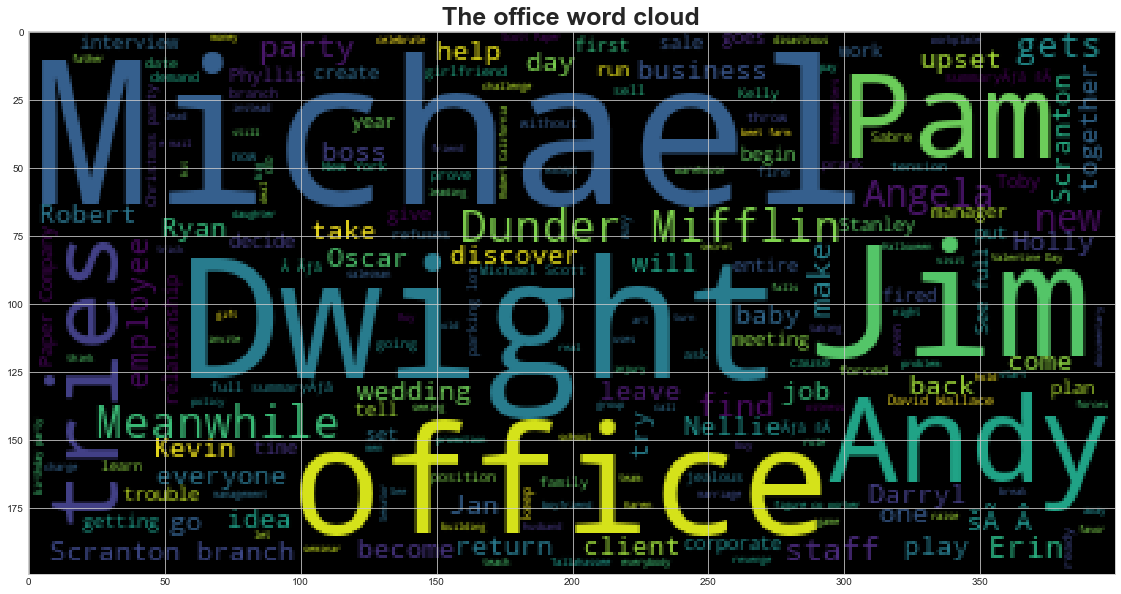

In [105]:
sent['tokens'] = sent['About'].apply(tokenizer)
sent_string = ' '.join(sent.About)

wc = WordCloud().generate(sent_string)
plt.title('The office word cloud', fontsize=25, fontweight='bold')
plt.imshow(wc)

In [109]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [110]:
# Download/Update the VADER Lexicon
nltk.download('vader_lexicon')

# Initialize the VADER sentiment analyzer
analyzer = SentimentIntensityAnalyzer()


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\ericm\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [ ]:
# use the actual data set the "about" column

In [234]:
office_df['Michael_count']=0
office_df.head()

,EpisodeTitle,About,Ratings,Viewership,Date,Michael_count
0,Pilot,The premiere episode introduces the boss and s...,7.5,11.2,24 March 2005,0
1,Diversity Day,Michael's off color remark puts a sensitivity ...,8.3,6.0,29 March 2005,0
2,Health Care,Michael leaves Dwight in charge of picking the...,7.8,5.8,5 April 2005,0
3,The Alliance,"Just for a laugh, Jim agrees to an alliance wi...",8.1,5.4,12 April 2005,0
4,Basketball,Michael and his staff challenge the warehouse ...,8.4,5.0,19 April 2005,0


In [235]:
# Create the sentiment scores DataFrame
NF_about_sentiments = []

for i in range(len(df5['About'])):
    
    try:
        text = office_df["About"][i]
        text_lst = text.split(' ')
        michael_count = 0
        for j in text_lst:
            if j=='Michael' or j=="Michael's":
                michael_count += 1
        office_df['Michael_count'][i] = michael_count
        date = office_df["Date"][i]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        NF_about_sentiments.append({
            "text": text,
            "date": date,
            "compound": compound,
            "positive": pos,
            "negative": neg,
            "neutral": neu,
            "michael_count": michael_count
            
        })
        
    except AttributeError:
        pass
    
# Create DataFrame
NF_about_df = pd.DataFrame(NF_about_sentiments)

# Reorder DataFrame columns
cols = ["date", "text", "compound", "positive", "negative", "neutral", "michael_count"]
NF_about_df = NF_about_df[cols]

NF_about_df.head()


,date,text,compound,positive,negative,neutral,michael_count
0,24 March 2005,The premiere episode introduces the boss and s...,0.0000,0.000,0.000,1.000,0
1,29 March 2005,Michael's off color remark puts a sensitivity ...,0.2732,0.104,0.000,0.896,2
2,5 April 2005,Michael leaves Dwight in charge of picking the...,-0.5994,0.000,0.187,0.813,1
3,12 April 2005,"Just for a laugh, Jim agrees to an alliance wi...",0.6597,0.310,0.000,0.690,0
4,19 April 2005,Michael and his staff challenge the warehouse ...,0.3612,0.205,0.077,0.718,1


In [219]:
NF_about_df.corr()

,compound,positive,negative,neutral,michael_count
compound,1.000000,0.688797,-0.785866,0.158884,-0.068316
positive,0.688797,1.000000,-0.219572,-0.554932,-0.101903
negative,-0.785866,-0.219572,1.000000,-0.689740,-0.013796
neutral,0.158884,-0.554932,-0.689740,1.000000,0.087467
michael_count,-0.068316,-0.101903,-0.013796,0.087467,1.000000


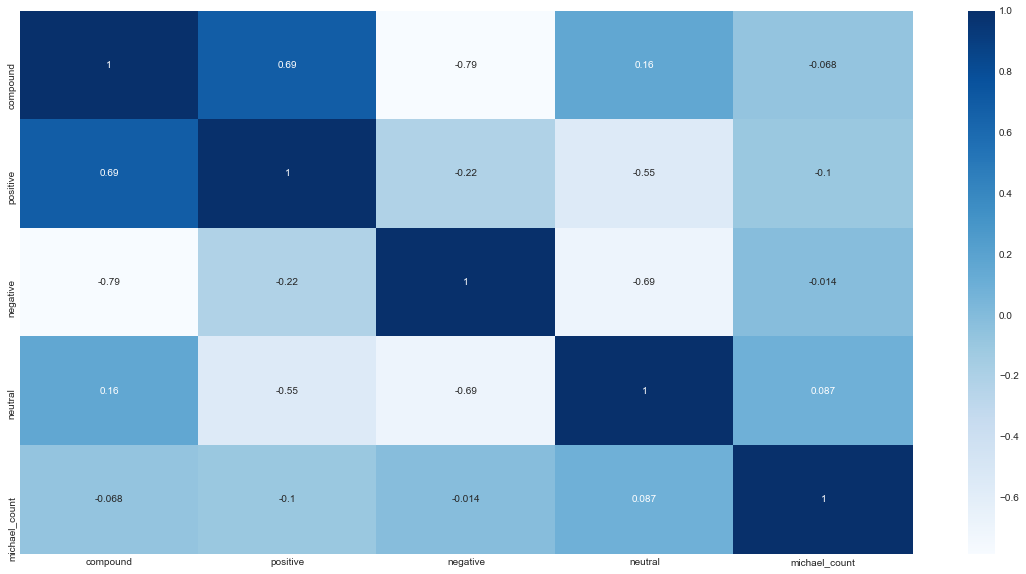

In [248]:
sns.heatmap(NF_about_df.corr(), cmap="Blues", annot=True)
plt.show()

In [236]:
mc_0=office_df.loc[office_df['Michael_count']==0]

mc0_avg_rating= round(mc_0.Ratings.mean(),2)
mc0_avg_rating

7.87

In [237]:
mc_1=office_df.loc[office_df['Michael_count']==1]

mc1_avg_rating= round(mc_1.Ratings.mean(),2)
mc1_avg_rating

8.38

In [239]:
mc_2=office_df.loc[office_df['Michael_count']==2]

mc2_avg_rating= round(mc_2.Ratings.mean(),2)
mc2_avg_rating

8.54

In [259]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

# Needed for decision tree visualization
import pydotplus
from IPython.display import Image

In [260]:
 # Define features set
X = office_df.copy()
X.drop("Michael_count", axis=1, inplace=True)
X.head()

,EpisodeTitle,About,Ratings,Viewership,Date
0,Pilot,The premiere episode introduces the boss and s...,7.5,11.2,24 March 2005
1,Diversity Day,Michael's off color remark puts a sensitivity ...,8.3,6.0,29 March 2005
2,Health Care,Michael leaves Dwight in charge of picking the...,7.8,5.8,5 April 2005
3,The Alliance,"Just for a laugh, Jim agrees to an alliance wi...",8.1,5.4,12 April 2005
4,Basketball,Michael and his staff challenge the warehouse ...,8.4,5.0,19 April 2005


In [261]:
# Define target vector
y = office_df["Michael_count"].ravel()
y[:5]

array([0, 2, 1, 0, 1], dtype=int64)

In [262]:
 # Splitting into Train and Test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)


In [263]:
# Creating StandardScaler instance
scaler = StandardScaler()

In [264]:
 # Fitting Standard Scaller
X_scaler = scaler.fit(X_train)

ValueError: could not convert string to float: "Andy's Play"

In [265]:
 # Scaling data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

NameError: name 'X_scaler' is not defined

In [ ]:
 # Create a random forest classifier
rf_model = RandomForestClassifier(n_estimators=500, random_state=78)


In [ ]:
 # Fitting the model
rf_model = rf_model.fit(X_train_scaled, y_train)

In [ ]:
 # Making predictions using the testing data
predictions = rf_model.predict(X_test_scaled)

In [ ]:
 # Calculating the confusion matrix
cm = confusion_matrix(y_test, predictions)
cm_df = pd.DataFrame(
    cm, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"]
)

# Calculating the accuracy score
acc_score = accuracy_score(y_test, predictions)


In [ ]:
 # Displaying results
print("Confusion Matrix")
display(cm_df)
print(f"Accuracy Score : {acc_score}")
print("Classification Report")
print(classification_report(y_test, predictions))

In [111]:
#API looking at headline for Netflix an "The Office"
NF_headlines = newsapi.get_everything(
    q="Netflix and The Office",
    language="en",
    page_size=100,
    sort_by="relevancy"
)

# Show sample article
NF_headlines["articles"][0]

{'source': {'id': 'wired', 'name': 'Wired'},
 'author': 'Angela Watercutter',
 'title': 'Amazon Just Bought MGM For Over $8 Billion. Your Move, Netflix',
 'description': 'The move is the latest, and greatest, in a new wave of media consolidation sparked by the streaming wars.',
 'url': 'https://www.wired.com/story/amazon-mgm-acquisition-streaming/',
 'urlToImage': 'https://media.wired.com/photos/60ae489b8fb37ccc1b53b684/191:100/w_1280,c_limit/Culture_MGM_default.jpg',
 'publishedAt': '2021-05-26T15:12:45Z',
 'content': 'Bond is moving into the house Bezos built. Its true. After a week of speculation, today Amazon announced it had indeed made a deal to buy MGM, the studio home of Rocky, RoboCop, and, yes, James Bond.… [+3478 chars]'}

In [114]:
# Create sentiment scores DataFrame
NF_sentiments = []

for article in NF_headlines["articles"]:
    try:
        text = article["content"]
        date = article["publishedAt"][:10]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        NF_sentiments.append({
            "text": text,
            "date": date,
            "compound": compound,
            "positive": pos,
            "negative": neg,
            "neutral": neu
            
        })
        
    except AttributeError:
        pass
    
# Create DataFrame
NF_df = pd.DataFrame(NF_sentiments)

# Reorder DataFrame columns
cols = ["date", "text", "compound", "positive", "negative", "neutral"]
NF_df = NF_df[cols]

NF_df.head()


,date,text,compound,positive,negative,neutral
0,2021-05-26,Bond is moving into the house Bezos built. Its...,0.7351,0.175,0.000,0.825
1,2021-05-21,The Monitor is a weekly columndevoted to every...,-0.4939,0.000,0.086,0.914
2,2021-05-24,"Martin, who is very bisexual, nonbinary and us...",0.0000,0.000,0.000,1.000
3,2021-04-28,Netflix today is officially launching a featur...,0.2023,0.078,0.056,0.866
4,2021-05-16,An obsession is a funny thing. It happens whil...,-0.2263,0.073,0.121,0.806


In [79]:
 # Load .env enviroment variables
load_dotenv()

# Set News API Key
newsapi = NewsApiClient(api_key=os.environ["NEWS_API_KEY"])

#set the dates
current_date = pd.Timestamp(datetime.now(), tz="America/New_York").isoformat()
past_date = pd.Timestamp(datetime.now()- timedelta(30), tz="America/New_York").isoformat()

In [90]:
# Use the `pct_change` function to calculate daily returns of AAPL
nflx_returns = df_closing_prices.pct_change().dropna()

# Display sample data
nflx_returns.head()

,NFLX
2018-01-03,0.019693
2018-01-04,0.002829
2018-01-05,0.020328
2018-01-08,0.010629
2018-01-09,-0.012875


In [80]:
# Use newsapi client to get most relevant 20 headlines per day in the past month
def get_headlines(keyword):
    all_headlines = []
    all_dates = []    
    date = datetime.strptime(current_date[:10], "%Y-%m-%d")
    end_date = datetime.strptime(past_date[:10], "%Y-%m-%d")
    print(f"Fetching news about '{keyword}'")
    print("*" * 30)
    while date > end_date:
        print(f"retrieving news from: {date}")
        articles = newsapi.get_everything(
            q=keyword,
            from_param=str(date)[:10],
            to=str(date)[:10],
            language="en",
            sort_by="relevancy",
            page=1,
        )
        headlines = []
        for i in range(0, len(articles["articles"])):
            headlines.append(articles["articles"][i]["title"])
        all_headlines.append(headlines)
        all_dates.append(date)
        date = date - timedelta(days=1)
    return all_headlines, all_dates

In [81]:
# Get first topic
nflx_headlines, dates = get_headlines("Netflix")

Fetching news about 'Netflix'
******************************
retrieving news from: 2021-05-27 00:00:00
retrieving news from: 2021-05-26 00:00:00
retrieving news from: 2021-05-25 00:00:00
retrieving news from: 2021-05-24 00:00:00
retrieving news from: 2021-05-23 00:00:00
retrieving news from: 2021-05-22 00:00:00
retrieving news from: 2021-05-21 00:00:00
retrieving news from: 2021-05-20 00:00:00
retrieving news from: 2021-05-19 00:00:00
retrieving news from: 2021-05-18 00:00:00
retrieving news from: 2021-05-17 00:00:00
retrieving news from: 2021-05-16 00:00:00
retrieving news from: 2021-05-15 00:00:00
retrieving news from: 2021-05-14 00:00:00
retrieving news from: 2021-05-13 00:00:00
retrieving news from: 2021-05-12 00:00:00
retrieving news from: 2021-05-11 00:00:00
retrieving news from: 2021-05-10 00:00:00
retrieving news from: 2021-05-09 00:00:00
retrieving news from: 2021-05-08 00:00:00
retrieving news from: 2021-05-07 00:00:00
retrieving news from: 2021-05-06 00:00:00
retrieving news

In [83]:
# Get second topic
office_headlines, _ = get_headlines("The Office")

Fetching news about 'The Office'
******************************
retrieving news from: 2021-05-27 00:00:00
retrieving news from: 2021-05-26 00:00:00
retrieving news from: 2021-05-25 00:00:00
retrieving news from: 2021-05-24 00:00:00
retrieving news from: 2021-05-23 00:00:00
retrieving news from: 2021-05-22 00:00:00
retrieving news from: 2021-05-21 00:00:00
retrieving news from: 2021-05-20 00:00:00
retrieving news from: 2021-05-19 00:00:00
retrieving news from: 2021-05-18 00:00:00
retrieving news from: 2021-05-17 00:00:00
retrieving news from: 2021-05-16 00:00:00
retrieving news from: 2021-05-15 00:00:00
retrieving news from: 2021-05-14 00:00:00
retrieving news from: 2021-05-13 00:00:00
retrieving news from: 2021-05-12 00:00:00
retrieving news from: 2021-05-11 00:00:00
retrieving news from: 2021-05-10 00:00:00
retrieving news from: 2021-05-09 00:00:00
retrieving news from: 2021-05-08 00:00:00
retrieving news from: 2021-05-07 00:00:00
retrieving news from: 2021-05-06 00:00:00
retrieving n

In [84]:
 # Instantiate SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer()

In [85]:
# Create function that computes average compound sentiment of headlines for each day
def headline_sentiment_summarizer_avg(headlines):
    sentiment = []
    for day in headlines:
        day_score = []
        for h in day:
            if h == None:
                continue
            else:
                day_score.append(sid.polarity_scores(h)["compound"])
        sentiment.append(sum(day_score) / len(day_score))
    return sentiment

In [86]:
 # Get averages of each topics sentiment
nflx_avg = headline_sentiment_summarizer_avg(nflx_headlines)
office_avg = headline_sentiment_summarizer_avg(office_headlines)

In [92]:
 # Combine Sentiment Averages into DataFrame
topic_sentiments = pd.DataFrame(
    {
        "nflx_avg": nflx_avg,
        "office_avg": office_avg,
    }
)

In [93]:
 # Set the index value of the sentiment averages DataFrame to be the series of dates.
topic_sentiments.index = pd.to_datetime(dates)

In [94]:
# Merge with NFLX returns
topic_sentiments = nflx_returns.join(topic_sentiments).dropna(how="any")

# Display data
display(topic_sentiments)

,NFLX,nflx_avg,office_avg
2021-04-28,0.002037,0.176845,-0.117885
2021-04-29,0.004896,0.028970,0.115300
2021-04-30,0.009311,0.258370,0.017210
2021-05-03,-0.009089,-0.022315,0.006860
2021-05-04,-0.010940,0.161285,0.082740
2021-05-05,-0.014596,-0.104625,0.053945
2021-05-06,0.006590,0.084410,-0.162165
2021-05-07,0.008609,0.072240,0.002830
2021-05-10,-0.034062,0.107665,0.026840
2021-05-11,0.017385,-0.117885,-0.082795


In [96]:
topic_sentiments.dtypes

NFLX          float64
nflx_avg      float64
office_avg    float64
dtype: object

In [97]:
topic_sentiments.corr()

,NFLX,nflx_avg,office_avg
NFLX,1.000000,-0.19831,-0.335992
nflx_avg,-0.198310,1.00000,0.087190
office_avg,-0.335992,0.08719,1.000000


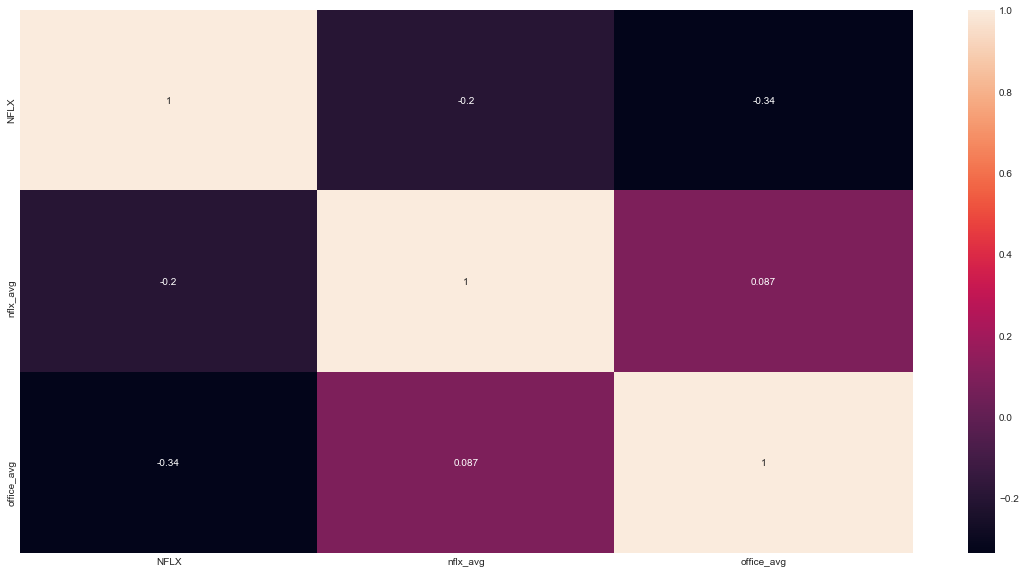

In [166]:
sns.heatmap(topic_sentiments.corr(), annot=True)

In [ ]:
# how you take the polarity scores and use them to rate a show. or how often the most populate words are used to coorelate score and how well they did
